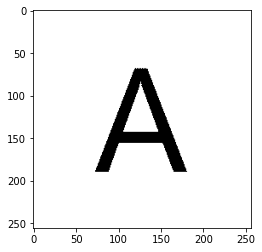

In [16]:
import numpy as np

from PIL import Image
from matplotlib import pyplot as plt
import optimize
import pandas as pd

secret = np.logical_not(np.array(Image.open("../A_256.png").convert("1"), dtype=bool))
plt.imshow(secret, cmap="gray_r")

# avg

In [17]:
K = 7
TIMES = 5
ks = [i for i in range(2, K + 1)]
result = []

for i in ks:
    result.append(
        optimize.optimize_sa3(i, markov=2000 * i, initial_temp=0.1, terminated_temp=0.1 / (2000 * i), ws=50))
    print(f"k={i} Done.")


k=2 Done.
k=3 Done.
k=4 Done.
k=5 Done.
k=6 Done.
k=7 Done.


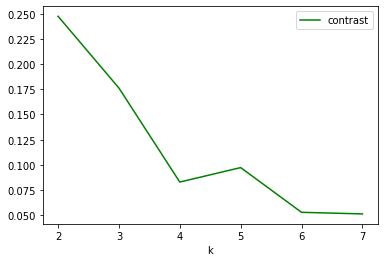

In [18]:
plt.xlabel("k")
plt.plot(ks, list(map(lambda x: x.contrast, result)), label="contrast", color="green")
plt.legend()

In [19]:
from optimize import safety_penalty_list

safety = []
for res in result:
    safety.append(safety_penalty_list(res.variables))
pd.DataFrame(safety)

,0,1,2,3,4,5
0,0.000989,NaN,NaN,NaN,NaN,NaN
1,0.000492,0.083725,NaN,NaN,NaN,NaN
2,0.006830,0.006415,0.040246,NaN,NaN,NaN
3,0.003155,0.000795,0.026597,0.060938,NaN,NaN
4,0.006325,0.003799,0.002702,0.010110,0.030045,NaN
5,0.001697,0.005914,0.004519,0.004735,0.018651,0.0347


In [20]:

for i in range(len(result)):
    pd.DataFrame(result[i].variables).to_csv(f"./sa3_safety/k={i + 2}.csv")